In [1]:
!pip install vizdoom

In [2]:
# !cd github & git clone https://github.com/Farama-Foundation/ViZDoom

In [3]:
# Import vizdoom for game env
from vizdoom import *
# Import random for action sampling
import random
# Import time for sleeping
import time
# Import numpy for identity matrix
import numpy as np

In [4]:
# Setup game
game = DoomGame()
game.load_config('github/ViZDoom/scenarios/basic.cfg')
game.init()

In [5]:
# This is the set of actions we can take in the environment
actions = np.identity(3, dtype=np.uint8)

In [6]:
state = game.get_state()

In [7]:
state.game_variables

array([50.])

In [8]:
# Loop through episodes
episodes = 10
for episode in range(episodes):
    # Create a new episode or game
    game.new_episode()
    # Check the game isn't done
    while not game.is_episode_finished():
        # Get the game state
        state = game.get_state()
        # Get the game image
        img = state.screen_buffer
        # Get the game variables - ammo
        info = state.game_variables
        # Take an action
        reward = game.make_action(random.choice(actions), 4)
        # Print reward
        print('reward: ', reward)
        time.sleep(0.02)
    print('Result: ', game.get_total_reward())
    time.sleep(2)

reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward:  -4.0
reward:  -4.0
reward:  -4.0
reward:  -9.0
reward

In [8]:
game.close()

## 2. Converting it to a Gym Environment

In [9]:
!pip install gym

In [10]:
!pip install opencv-python

In [11]:
# Import environment base class from OpenAI Gym
from gym import Env
# Import gym spaces
from gym.spaces import Discrete, Box
# Import opencv
import cv2

In [12]:
# Create Vizdoom OpenAI Gym Environment
class VizDoomGym(Env):
    # Function that is called when we start the env
    def __init__(self, render=False):
        # Inherit from Env
        super().__init__()
        # Setup the game
        self.game = DoomGame()
        self.game.load_config('github/ViZDoom/scenarios/basic.cfg')

        # Render frame logic
        if render == False:
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)

        # Start the game
        self.game.init()

        # Create the action space and observation space
        self.observation_space = Box(low=0, high=255, shape=(100, 160, 1), dtype=np.uint8)
        self.action_space = Discrete(3)
    
    # This is how we take a step in the environment
    def step(self, action):
        # Specify action and take step
        actions = np.identity(3)
        reward = self.game.make_action(actions[action], 4) # 4 here is the frameskip parameter which makes the game run faster

        # Get all the other stuff we need to return
        if self.game.get_state():
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            ammo = self.game.get_state().game_variables[0]
            info = ammo
        else:
            state = np.zeros(self.observation_space.shape)
            info = 0

        info = {'info': info}
        done = self.game.is_episode_finished()

        return state, reward, done, info
        
    # Define how to render the game or environment
    def render():
        pass

    # What happens when we start a new game
    def reset(self):
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)

    # Grayscale the game frame and resize it 
    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return state

    # Call to close down the game
    def close(self):
        self.game.close()

In [13]:
env = VizDoomGym(render=True)

In [14]:
state = env.reset()

In [15]:
env.step(2)

(array([[[55],
         [50],
         [59],
         ...,
         [57],
         [57],
         [66]],
 
        [[68],
         [65],
         [65],
         ...,
         [56],
         [67],
         [72]],
 
        [[49],
         [79],
         [66],
         ...,
         [79],
         [51],
         [29]],
 
        ...,
 
        [[75],
         [63],
         [62],
         ...,
         [44],
         [71],
         [60]],
 
        [[15],
         [48],
         [47],
         ...,
         [49],
         [69],
         [47]],
 
        [[22],
         [14],
         [26],
         ...,
         [57],
         [37],
         [39]]], dtype=uint8),
 -4.0,
 False,
 {'info': 50.0})

In [16]:
env.close()

In [17]:
# Import Environment checker
from stable_baselines3.common import env_checker

In [18]:
# env_checker.check_env(env)

## 3. View State

In [19]:
from matplotlib import pyplot as plt

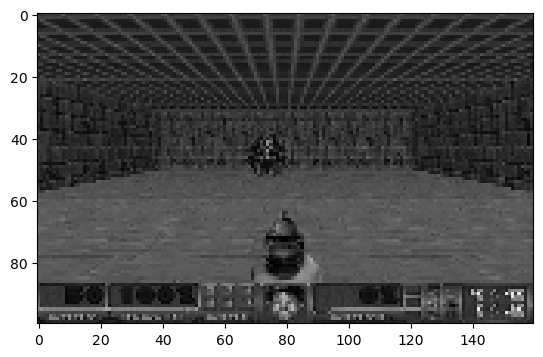

In [20]:
plt.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))

## 4. Setup Callback

In [21]:
!pip install stable-baselines3[extra]

In [22]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [23]:
# Import os for file nav
import os 
# Import callback class from sb3
from stable_baselines3.common.callbacks import BaseCallback

In [26]:
class TrainAndLoggingCallback(BaseCallback):
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [27]:
CHECKPOINT_DIR = './train_dqn/train_basic'
LOG_DIR = './logs_dqn/log_basic'

In [28]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

## 5. Train Gym

In [29]:
# Import ppo for training 
from stable_baselines3 import DQN

In [30]:
# Non rendered environment
env = VizDoomGym()

In [33]:
# model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.0001, n_steps=2048)
# model = DQN('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.0001, buffer_size=1000000, learning_starts=100, batch_size=32, tau=1.0, gamma=0.99, train_freq=4, gradient_steps=1, target_update_interval=10000, exploration_fraction=0.1, exploration_initial_eps=1.0, exploration_final_eps=0.05, max_grad_norm=10)
# model = DQN('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.0001, buffer_size=500000, learning_starts=100, batch_size=16, tau=1.0, gamma=0.99, train_freq=4, gradient_steps=1, target_update_interval=10000, exploration_fraction=0.1, exploration_initial_eps=1.0, exploration_final_eps=0.05, max_grad_norm=10, optimize_memory_usage=True)
# model = DQN(
#     'CnnPolicy', 
#     env, 
#     tensorboard_log=LOG_DIR, 
#     verbose=1, 
#     learning_rate=0.0001,             # Lower learning rate for more stable learning
#     buffer_size=50000,               # Increase buffer size to hold more experience
#     learning_starts=500,              # Start learning earlier for quicker adaptation
#     batch_size=32,                    # Increase batch size for more robust training updates
#     tau=1.0,                          # Keep tau at 1.0 (for hard updates)
#     gamma=0.99,                       # Keep gamma for discounting future rewards
#     train_freq=4,                     # Keep training frequency
#     gradient_steps=1,                 # Keep gradient steps
#     target_update_interval=1000,      # Reduce target network update frequency for faster adaptation
#     exploration_fraction=0.15,        # Explore for the first 15% of timesteps to ensure proper exploration
#     exploration_initial_eps=1.0,      # Start with fully random exploration
#     exploration_final_eps=0.02,       # Lower final epsilon to reduce random actions over time
#     max_grad_norm=10                  # Keep gradient clipping to stabilize training
# )

model = DQN(
    'CnnPolicy', 
    env, 
    tensorboard_log=LOG_DIR, 
    verbose=1, 
    learning_rate=0.0001,             # Keep the learning rate stable for gradual learning
    buffer_size=50000,                # Sufficient buffer size for storing experiences
    learning_starts=500,              # Start learning earlier for quicker adaptation
    batch_size=32,                    # Larger batch size for more robust updates
    tau=1.0,                          # Keep tau at 1.0 (hard target updates)
    gamma=0.99,                       # Standard discount for future rewards
    train_freq=4,                     # Train every 4 steps
    gradient_steps=1,                 # Single gradient step per training iteration
    target_update_interval=5000,      # Moderate update interval for more stable learning
    exploration_fraction=0.25,        # Increase exploration to 25% to encourage diverse actions
    exploration_initial_eps=1.0,      # Start fully random exploration
    exploration_final_eps=0.05,       # Slightly higher final exploration rate to keep some randomness
    max_grad_norm=10,                 # Gradient clipping to stabilize training
    optimize_memory_usage=False       # Disable to prevent memory and timeout conflict
)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


C:\projects\shradha-doom\env\lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.60GB > 1.01GB
  warnings.warn(


In [34]:
model.learn(total_timesteps=100000, callback=callback)

Logging to ./logs_dqn/log_basic\DQN_1
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 44.5     |
|    ep_rew_mean      | -165     |
|    exploration_rate | 0.993    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 99       |
|    time_elapsed     | 1        |
|    total_timesteps  | 178      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30       |
|    ep_rew_mean      | -67.8    |
|    exploration_rate | 0.991    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 115      |
|    time_elapsed     | 2        |
|    total_timesteps  | 240      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33       |
|    ep_rew_mean      | -90.8    |
|    exploration_rate | 0.985    |
| time/          

## 6. Test the Model

In [48]:
# Import eval policy to test agent
from stable_baselines3.common.evaluation import evaluate_policy

In [49]:
# Reload model from disk
model = DQN.load('./train_dqn/train_basic/best_model_60000.zip')

In [50]:
# Create rendered environment
env = VizDoomGym(render=True)

In [51]:
# Evaluate mean reward for 10 games
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=100)

In [52]:
mean_reward

1.27

In [53]:
for episode in range(5):
    obs = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        time.sleep(0.20)
        total_reward += reward

    print('Total Reward for episode {} is {}'.format(episode, total_reward))
    time.sleep(2)

Total Reward for episode 0 is 87.0
Total Reward for episode 1 is 67.0
Total Reward for episode 2 is 2.0
Total Reward for episode 3 is 87.0
Total Reward for episode 4 is 22.0


In [54]:
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=100)
print(f'Mean reward over 100 episodes: {mean_reward}')

Mean reward over 100 episodes: 43.46


In [55]:
episode_lengths = []
success_count = 0
rewards = []

# Define a success threshold (e.g., 10 as an example; adjust based on your environment)
success_threshold = 10

for episode in range(100):
    obs = env.reset()
    done = False
    total_reward = 0
    steps = 0

    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        total_reward += reward
        steps += 1

    episode_lengths.append(steps)
    rewards.append(total_reward)
    
    # Check if the episode is successful
    if total_reward > success_threshold:
        success_count += 1

avg_episode_length = np.mean(episode_lengths)
success_rate = success_count / 100
reward_variance = np.var(rewards)

print(f'Average Episode Length: {avg_episode_length}')
print(f'Success Rate: {success_rate}')
print(f'Reward Variance (Stability): {reward_variance}')

Average Episode Length: 14.23
Success Rate: 0.82
Reward Variance (Stability): 12293.041099999999


### Import Necessary Libraries for Visualization

In [56]:
import matplotlib.pyplot as plt
import numpy as np

### Visualizations!

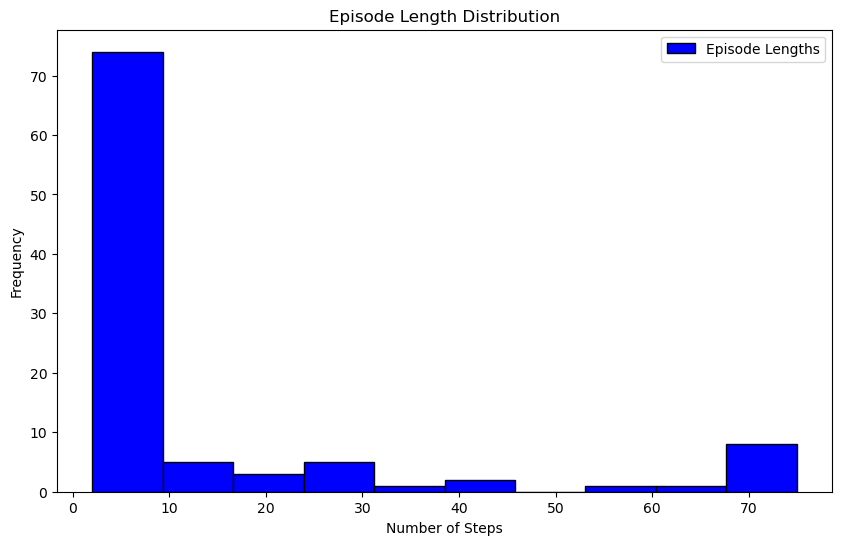

In [57]:
# Visualize Episode Length Distribution
plt.figure(figsize=(10, 6))
plt.hist(episode_lengths, bins=10, color='blue', edgecolor='black', label='Episode Lengths')
plt.title('Episode Length Distribution')
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add legend
plt.show()

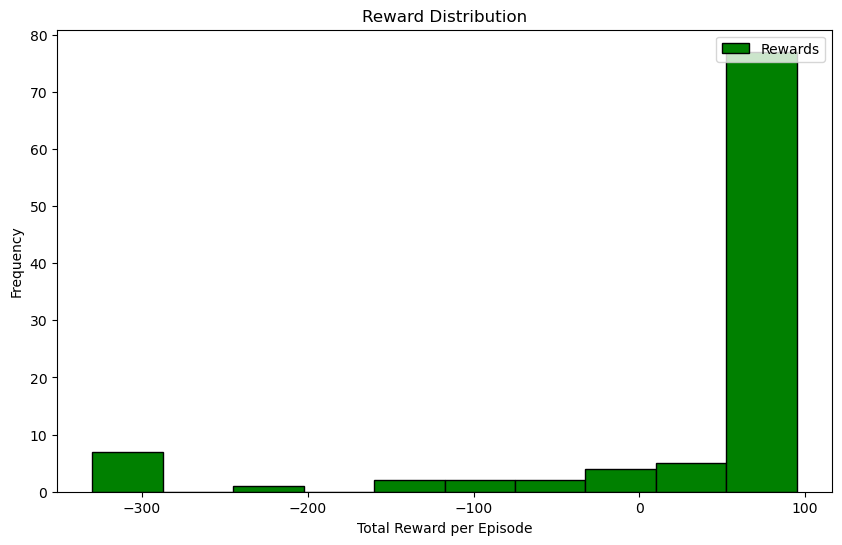

In [58]:
# Visualize Reward Distribution
plt.figure(figsize=(10, 6))
plt.hist(rewards, bins=10, color='green', edgecolor='black', label='Rewards')
plt.title('Reward Distribution')
plt.xlabel('Total Reward per Episode')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add legend
plt.show()

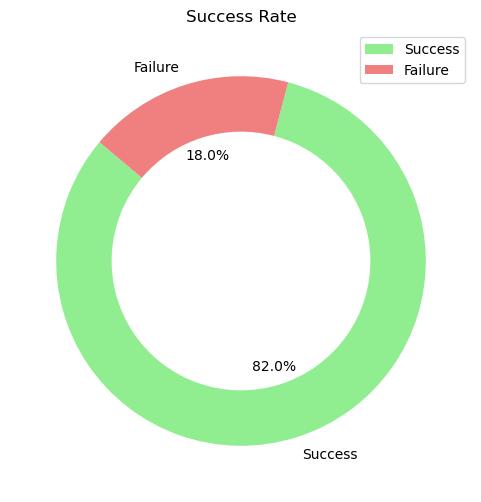

In [59]:
# Visualize Success Rate (Doughnut Chart)
plt.figure(figsize=(6, 6))
labels = ['Success', 'Failure']
sizes = [success_rate * 100, (1 - success_rate) * 100]
colors = ['lightgreen', 'lightcoral']

# Create a doughnut chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))

# Add a legend
plt.legend(labels, loc='best')

plt.title('Success Rate')
plt.show()

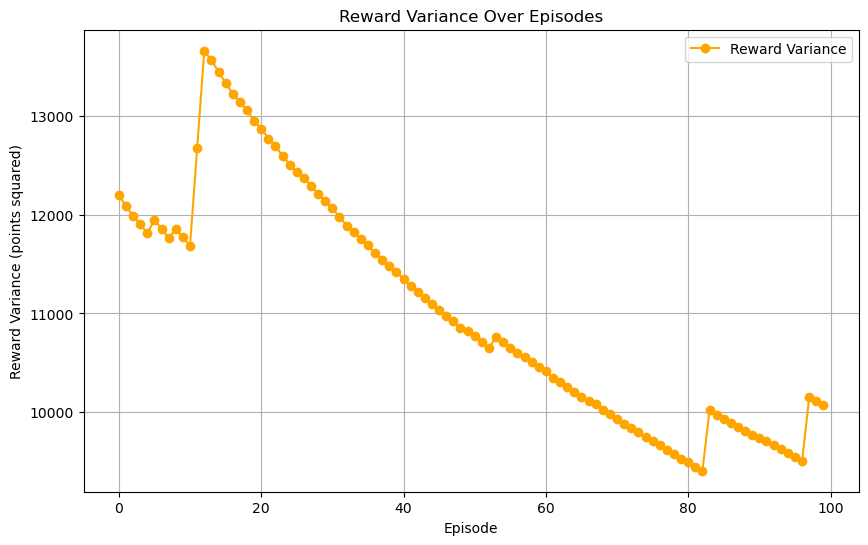

In [60]:
# Visualize Reward Variance Over Time (Line Chart)
reward_variances = []

for episode in range(100):
    obs = env.reset()
    done = False
    total_reward = 0

    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        total_reward += reward

    rewards.append(total_reward)
    if len(rewards) > 1:
        variance = np.var(rewards)
        reward_variances.append(variance)

# Create a line chart for reward variance
plt.figure(figsize=(10, 6))
plt.plot(reward_variances, color='orange', marker='o', label='Reward Variance')
plt.title('Reward Variance Over Episodes')
plt.xlabel('Episode')
plt.ylabel('Reward Variance (points squared)')
plt.grid(True)
plt.legend(loc='upper right')  # Add legend
plt.show()